In [1]:
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [3]:
import numpy as np
import pandas as pd
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [4]:
from matplotlib import pyplot
import math

In [5]:
session_df = pd.read_csv('session_related.csv')
delivery_df = pd.read_csv('delivery_related.csv')
outlier_df = pd.read_csv('generic_outliers_data.csv')

In [6]:
ds_merge_df = pd.merge(delivery_df,session_df,on='OrderId')

In [7]:
df = pd.merge(ds_merge_df,outlier_df,on='CustId')

In [8]:
from sklearn.preprocessing import LabelEncoder
categorical = ['IncomeLevel','OccupationalLevel','IsValidAddress','IsAddchangeRecently','IsAddchangeonDel','IsDeliveryRejected','IsProductConsumable','IsOneTimeUseProduct','IsOfferCodeApplied','IsValidGeo']

label_encoder = LabelEncoder()
for col in categorical:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

df=df.iloc[:df.shape[0]]

In [9]:
df['OrderDate'] =  pd.to_datetime(df['OrderDate'],format='%d/%m/%Y')
df['AddressChangeDate'] =  pd.to_datetime(df['AddressChangeDate'],format='%d/%m/%Y')
df['DeliveryDate'] =  pd.to_datetime(df['DeliveryDate'],format='%d/%m/%Y')
df['ReplacementDate'] =  pd.to_datetime(df['ReplacementDate'],format='%d/%m/%Y')


In [10]:
def extract_date(df,column):
    df[column+"_year"] = df[column].apply(lambda x: x.year) 
    df[column+"_month"] = df[column].apply(lambda x: x.month)
    df[column+"_date"] = df[column].apply(lambda x: x.day)    

In [11]:
extract_date(df,'OrderDate')
extract_date(df,'AddressChangeDate')
extract_date(df,'DeliveryDate')
extract_date(df,'ReplacementDate')

In [12]:
# delete unnecessary feature from dataset

print("Before", df.shape)
features_drop = ['EmailId','MobileNo','MacAddress','City','Pincode', 'IP_start_session', 'IP_end_session',
                'CustId','OrderId','ProductId','OrderDate', 'AddressChangeDate','DeliveryDate',
                'ReplacementDate']
train_data = df.drop(features_drop, axis=1)
labels = train_data['Fraud']
features = train_data.drop('Fraud', axis=1)
print("After",train_data.shape)

Before (100000, 43)
After (100000, 29)


In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
features = features.apply(LabelEncoder().fit_transform)
features.head()

,IsValidAddress,IsAddchangeRecently,IsAddchangeonDel,IsDeliveryRejected,OriginalPrice,PaidPrice,IsProductConsumable,IsOneTimeUseProduct,IsOfferCodeApplied,Session_Pincode,...,OrderDate_date,AddressChangeDate_year,AddressChangeDate_month,AddressChangeDate_date,DeliveryDate_year,DeliveryDate_month,DeliveryDate_date,ReplacementDate_year,ReplacementDate_month,ReplacementDate_date
0,1,0,1,1,1711,1728,1,0,0,134,...,24,0,10,19,0,0,27,0,1,0
1,0,1,0,0,1713,1727,1,1,0,383,...,5,1,1,2,0,1,9,0,1,16
2,1,0,1,1,3146,3159,1,0,1,522,...,11,0,6,29,0,0,21,0,1,0
3,0,1,0,0,1662,1679,1,1,1,787,...,18,0,8,14,0,0,25,0,0,30
4,1,0,1,0,1709,1724,1,0,1,112,...,26,0,5,13,0,3,2,0,3,5


In [14]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(labels)
labels_enc = encoder.transform(labels)

Train on 80000 samples, validate on 20000 samples
Epoch 1/10
 - 13s - loss: -3.1893e+00 - acc: 0.6991 - val_loss: -3.1709e+00 - val_acc: 0.7033
Epoch 2/10
 - 13s - loss: -3.1929e+00 - acc: 0.6992 - val_loss: -3.1709e+00 - val_acc: 0.7033
Epoch 3/10
 - 12s - loss: -3.1929e+00 - acc: 0.6992 - val_loss: -3.1709e+00 - val_acc: 0.7033
Epoch 4/10
 - 12s - loss: -3.1929e+00 - acc: 0.6992 - val_loss: -3.1709e+00 - val_acc: 0.7033
Epoch 5/10
 - 13s - loss: -3.1929e+00 - acc: 0.6992 - val_loss: -3.1709e+00 - val_acc: 0.7033
Epoch 6/10
 - 14s - loss: -3.1929e+00 - acc: 0.6992 - val_loss: -3.1709e+00 - val_acc: 0.7033
Epoch 7/10
 - 13s - loss: -3.1929e+00 - acc: 0.6992 - val_loss: -3.1709e+00 - val_acc: 0.7033
Epoch 8/10
 - 12s - loss: -3.1929e+00 - acc: 0.6992 - val_loss: -3.1709e+00 - val_acc: 0.7033
Epoch 9/10
 - 12s - loss: -3.1929e+00 - acc: 0.6992 - val_loss: -3.1709e+00 - val_acc: 0.7033
Epoch 10/10
 - 16s - loss: -3.1929e+00 - acc: 0.6992 - val_loss: -3.1709e+00 - val_acc: 0.7033


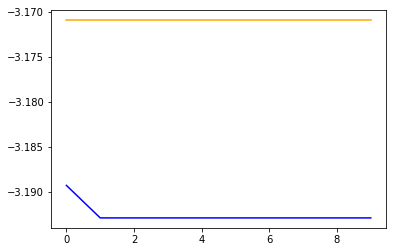

In [15]:

def step_decay(epoch):
	initial_lrate = 0.001
	#drop = 0.5
	#epochs_drop = 10.0
	#lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return initial_lrate

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels_enc, test_size=0.20, random_state=42)
# create model
model = Sequential()
model.add(Dense(29, input_dim=28, kernel_initializer='uniform', activation='relu'))
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(70, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
#early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=2)

lrate = LearningRateScheduler(step_decay)
#callbacks_list = [early_stop,lrate]
callbacks_list = [lrate]
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test), batch_size=10,  verbose=2,callbacks=callbacks_list)
pyplot.plot(history.history['loss'], color='blue')
pyplot.plot(history.history['val_loss'], color='orange')


In [20]:
from sklearn.metrics import accuracy_score
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_pred,y_val,average=None))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_pred,y_val,average=None))


print("F1 score:",metrics.f1_score(y_pred,y_val,average=None))

NameError: name 'metrics' is not defined

In [18]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.5